# LASSO AND RIDGE REGRESSION

In [12]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, LinearRegression, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [13]:
data = {

     "Area": [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],

     "Bedrooms": [1, 2, 2, 2, 3, 3, 3, 4, 4, 4],

     "Bathrooms": [1, 1, 2, 2, 2, 2, 3, 3, 3, 3],

     "Age": [15, 12, 10, 8, 6, 5, 4, 3, 2, 1],

     "Distance_City": [15, 14, 13, 12, 10, 9, 8, 7, 6, 5],
    
     "Price":[40, 50, 55, 60, 70, 75, 80, 90, 95, 100]
}
df = pd.DataFrame(data)

In [14]:
X = df.drop("Price", axis=1)
Y = df["Price"]

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
linear=LinearRegression()
linear.fit(X_train_scaled,Y_train)


LinearRegression()

In [26]:
ridge = Ridge(alpha=2.0)

ridge.fit(X_train_scaled,Y_train)

Ridge(alpha=2.0)

In [24]:


Y_train_pred_lin = linear.predict(X_train_scaled)

Y_test_pred_lin = linear.predict(X_test_scaled)



In [33]:
train_mse_lin = mean_squared_error(Y_train, Y_train_pred_lin)

test_mse_lin = mean_squared_error(Y_test, Y_test_pred_lin)

print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)


Train MSE: 5.679798517591285e-29
Test MSE: 2.0194839173657902e-28


In [35]:
train_mse_lin = mean_squared_error(Y_train, Y_train_pred_lin)

test_mse_lin = mean_squared_error(Y_test, Y_test_pred_lin)

print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 5.679798517591285e-29
Test MSE: 2.0194839173657902e-28


In [36]:
y_train_pred_rid = ridge.predict(X_train_scaled)

y_test_pred_rid = ridge.predict(X_test_scaled)

In [37]:
train_mse_rid = mean_squared_error(Y_train, Y_train_pred_rid)

test_mse_rid = mean_squared_error(Y_test, Y_test_pred_rid)

print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 2.72580460390538
Test MSE: 3.19803774145094


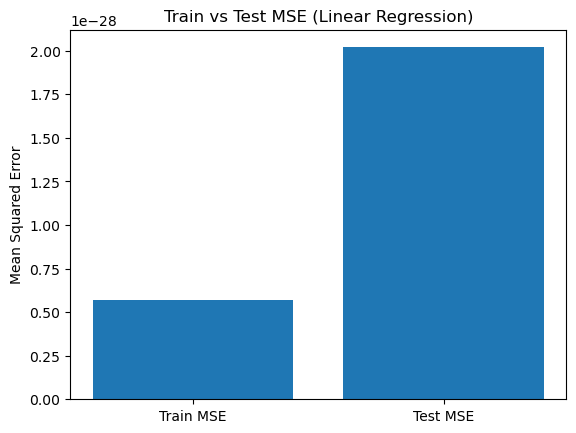

In [38]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lin,test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

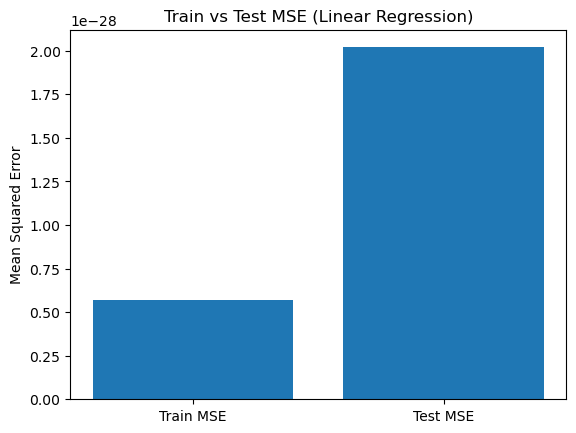

In [39]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lin,test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

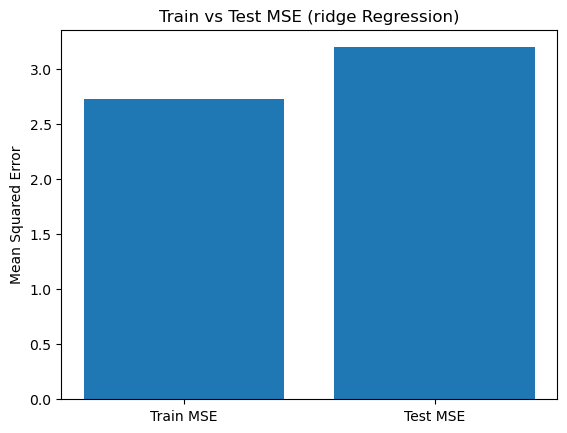

In [40]:
plt.bar(["Train MSE","Test MSE"],[train_mse_rid,test_mse_rid])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (ridge Regression)")
plt.show()

In [41]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, Y_train)

Lasso(alpha=0.5)

In [42]:
Y_train_pred = lasso.predict(X_train_scaled)
Y_test_pred = lasso.predict(X_test_scaled)

In [44]:
Train_MSE_Lasso = mean_squared_error(Y_train, Y_train_pred)
Test_MSE_Lasso = mean_squared_error(Y_test, Y_test_pred)

print("Train MSE:", Train_MSE_Lasso)
print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.2540521315349213
Test MSE: 0.35590211738900734


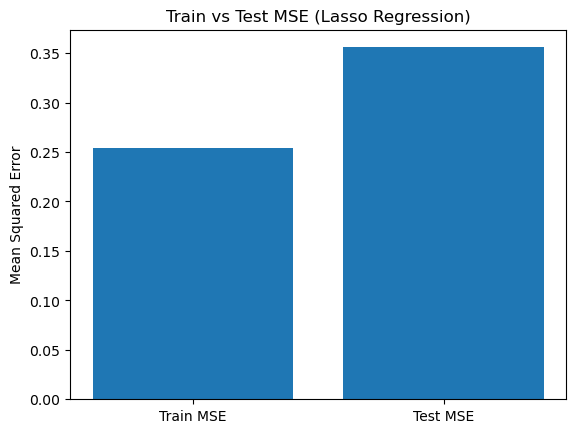

In [48]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Lasso Regression)")
plt.show()

In [50]:
lasso_coefficients=pd.Series(lasso.coef_,index=X.columns)
print(lasso_coefficients)


Area             13.200626
Bedrooms          4.581169
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.013020
dtype: float64


In [51]:
X_plot=pd.DataFrame({
    "Area":np.linspace(df["Area"].min(),df["Area"].max(),100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms":df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distance_City": df["Distance_City"].mean()
    })

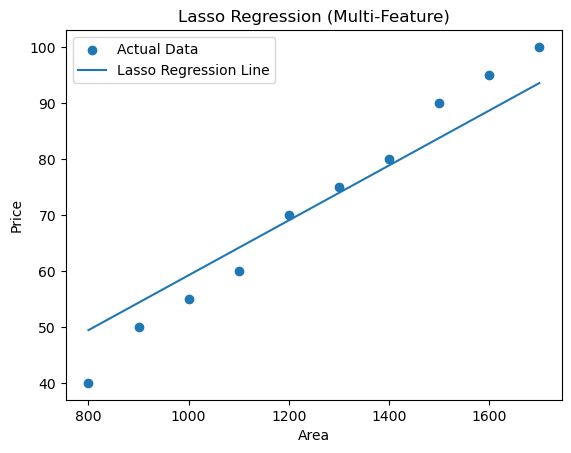

In [52]:
x_plot_scaled=scaler.transform(X_plot)
y_line=lasso.predict(x_plot_scaled)
plt.scatter(df["Area"],df["Price"],label="Actual Data")
plt.plot(X_plot["Area"],y_line,label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.legend()
plt.show()